In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [9]:
data = pd.read_csv("E:\\kc_house_data.csv")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [10]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [31]:
x=data["sqft_lot"].values[:,np.newaxis]
y=data["price"].values

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

In [35]:
model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

LinearRegression()

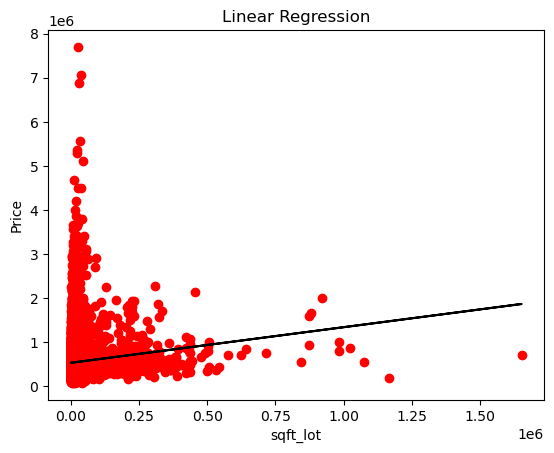

In [36]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("Price")
plt.xlabel("sqft_lot")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [38]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 124884129192.88837
R squared 0.006629158583476458


In [40]:
x=data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']]
y=data["price"].values

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

In [43]:
model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

In [44]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 62226671301.184715
R squared 0.5050278908256394


In [46]:
x=data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']]
y=data["price"].values

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data

In [48]:
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)
x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

In [49]:
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  58625616771.721306
R squared:  0.5336719034078528


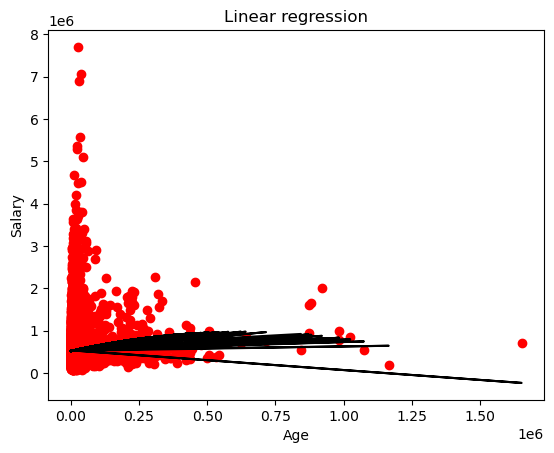

In [52]:
x= data["sqft_lot"].values.reshape(-1,1)
y= data["price"].values
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 
plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("Salary")
plt.xlabel("Age")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 